In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_theme()
from datetime import datetime
from tqdm import tqdm
import ast
import geopandas
import folium
import branca

netflix = pd.read_csv("Netflix_cleaned_1.csv")
hulu = pd.read_csv("Hulu_cleaned_1.csv")
hulu_f = pd.read_csv('Hulu_for_difference.csv')


In [195]:
# netflix['country_cleaned'] = netflix['country'].apply(lambda x: x.split(',') if pd.notna(x) else x)

# countries = []
# for i in range(len(netflix)):
#     try:
#         if len(netflix['country_cleaned'][i]) == 1:
#             countries.append(netflix['country_cleaned'][i][0])
#         else:
#             countries.append("Multi-Country")
#     except:
#         countries.append(np.nan)

# netflix['country_cleaned_2'] = countries

In [178]:
# netflix.to_csv("Netflix_cleaned_1.csv", index=False)

In [201]:
# hulu['country_cleaned'] = hulu['country'].apply(lambda x: x.split(',') if pd.notna(x) else x)

# countries = []
# for i in range(len(hulu)):
#     try:
#         if len(hulu['country_cleaned'][i]) == 1:
#             countries.append(hulu['country_cleaned'][i][0])
#         else:
#             countries.append("Multi-Country")
#     except:
#         countries.append(np.nan)

# hulu['country_cleaned_2'] = countries

In [202]:
# hulu.to_csv("Hulu_cleaned_1.csv", index=False)

In [162]:
netflix['description'][0]

'as her father nears the end of his life, filmmaker kirsten johnson stages his death in inventive and comical ways to help them both face the inevitable.'

## Basic EDA

In [2]:
netflix.columns

Index(['type', 'country', 'date_added', 'month', 'day', 'year', 'release_year',
       'rating', 'duration_min', 'duration_season', 'difference', 'continent',
       'country_cleaned', 'duration', 'listed_in', 'description', 'show_id',
       'director', 'cast', 'title'],
      dtype='object')

In [41]:
netflix_type = netflix.groupby(['year','type']).size().unstack()
hulu_type = hulu.groupby(['year','type']).size().unstack()

In [42]:
netflix_type.fillna(0, inplace=True)
hulu_type.fillna(0, inplace=True)

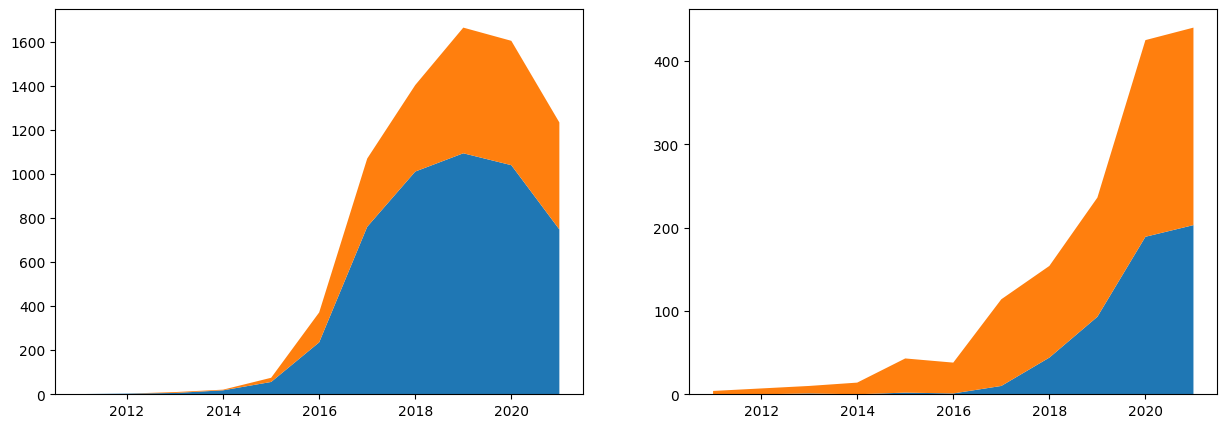

In [75]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].stackplot(netflix_type.index, netflix_type['movie'].values, netflix_type['tv show'].values)
ax[1].stackplot(hulu_type.index, hulu_type['movie'].values, hulu_type['tv show'].values)

plt.show()

#make the y-axis same, add legend and beautify

In [58]:
hulu['duration_season'].replace('na', np.nan, inplace=True)
hulu['duration_min'].replace('missing', np.nan, inplace=True)

In [65]:
hulu['duration_min'] = hulu['duration_min'].astype(float)
hulu['duration_season'] = hulu['duration_season'].astype(float)

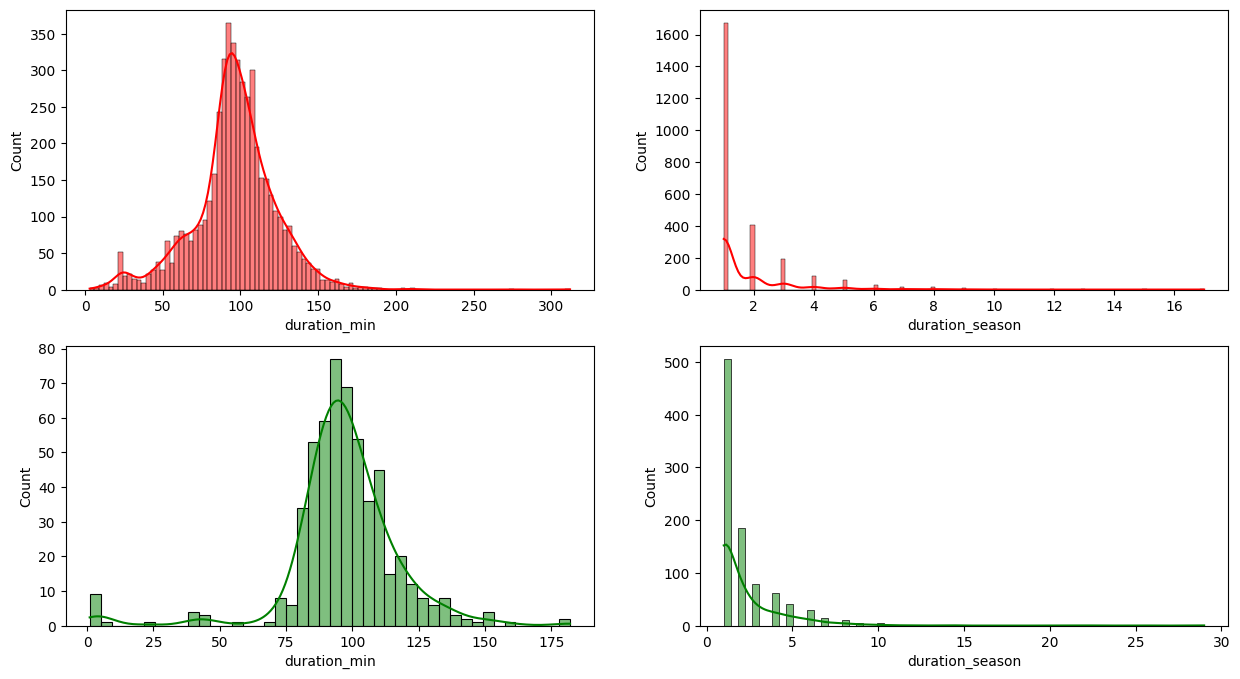

In [71]:
fig, ax = plt.subplots(2,2,figsize=(15,8))
sns.histplot(netflix['duration_min'], label='Netflix Movie', ax=ax[0][0], color='red', kde=True)
sns.histplot(netflix['duration_season'], label='Netflix TV Show', ax=ax[0][1], color='red', kde=True)
sns.histplot(hulu['duration_min'], label='Hulu Movie', ax=ax[1][0], color='green', kde=True)
sns.histplot(hulu['duration_season'], label='Hulu TV Show', ax=ax[1][1], color='green', kde=True)

plt.show()

In [54]:
max(hulu['duration_min']), min(hulu['duration_min'])

('missing', '1')

# 1.

<div class="alert alert-block alert-warning">

#1 (gopi)
* Question: trend of how long does netflix take to add on the show of past vs current
* Columns req: "difference", "type"
* Comments: We can include the type as well (like how lon TV shows take to be added to Netflix in comparison to Movies)
* Business perspective can be: If the time to be added to Netflix from the release date is lesser, it's a good point to attract the customers


In [3]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'], format='%Y-%m-%d')
hulu_f['date_added'] = pd.to_datetime(hulu_f['date_added'], format='%Y-%m-%d')

In [61]:
netflix.head(2)

,type,country,date_added,month,day,year,release_year,rating,duration_min,duration_season,difference,continent,country_cleaned,duration,listed_in,description,show_id,director,cast,title
0,movie,united states,2021-09-25,9,25,2021,2020,pg-13,90.0,NaN,20,north america,missing,90 min,documentaries,"as her father nears the end of his life, filmm...",s1,kirsten johnson,missing,dick johnson is dead
1,tv show,south africa,2021-09-24,9,24,2021,2021,tv-ma,NaN,2.0,8,africa,missing,2 seasons,"international tv shows, tv dramas, tv mysteries","after crossing paths at a party, a cape town t...",s2,missing,"ama qamata, khosi ngema, gail mabalane, thaban...",blood & water


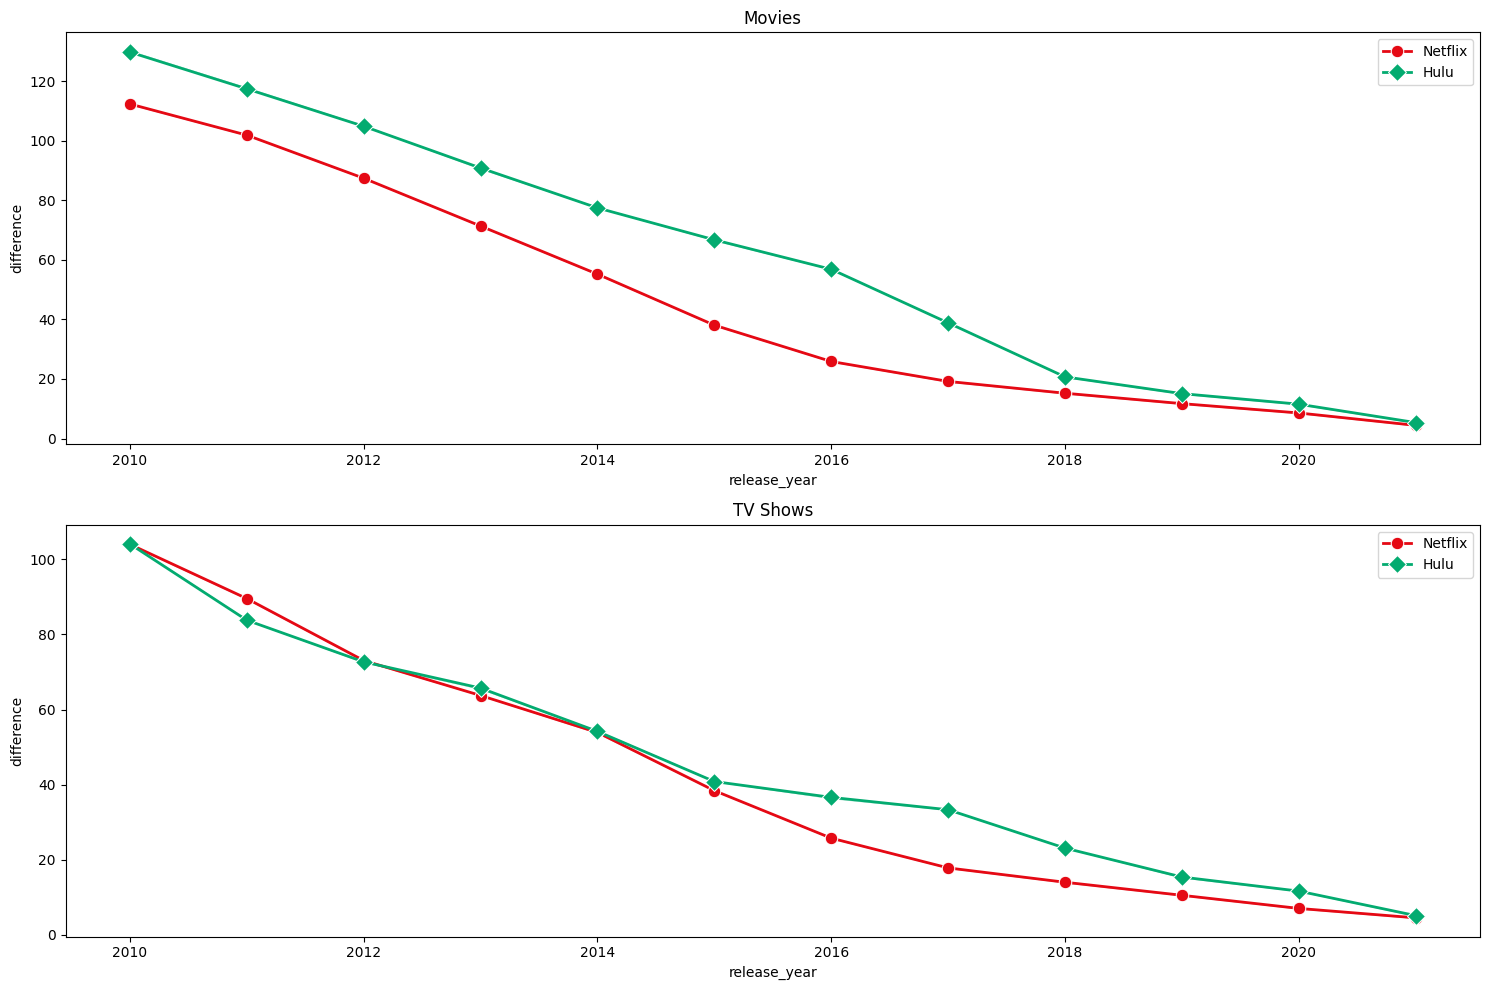

In [37]:
fig, ax = plt.subplots(2, 1, figsize=(15,10))

ax[0] = sns.lineplot(data=netflix[netflix['type']=='movie'], x='release_year', y='difference', marker='o', markersize=9, ax=ax[0], color='#E50914',
                     label='Netflix', linewidth=2, errorbar=('ci', False))
ax[0] = sns.lineplot(data=hulu[hulu['type']=='movie'], x='release_year', y='difference', marker='D', markersize=9, ax=ax[0], color='#03ab70',
                      label='Hulu', linewidth=2, errorbar=('ci', False))

ax[1] = sns.lineplot(data=netflix[netflix['type']=='tv show'], x='release_year', y='difference', marker='o', markersize=9, ax=ax[1], color='#E50914',
                      label='Netflix', linewidth=2, errorbar=('ci', False))
ax[1] = sns.lineplot(data=hulu[hulu['type']=='tv show'], x='release_year', y='difference', marker='D', markersize=9, ax=ax[1], color='#03ab70',
                      label='Hulu', linewidth=2, errorbar=('ci', False))

ax[0].set_title("Movies")
ax[1].set_title("TV Shows")

plt.tight_layout()
plt.show()

# barplot on this overlapped


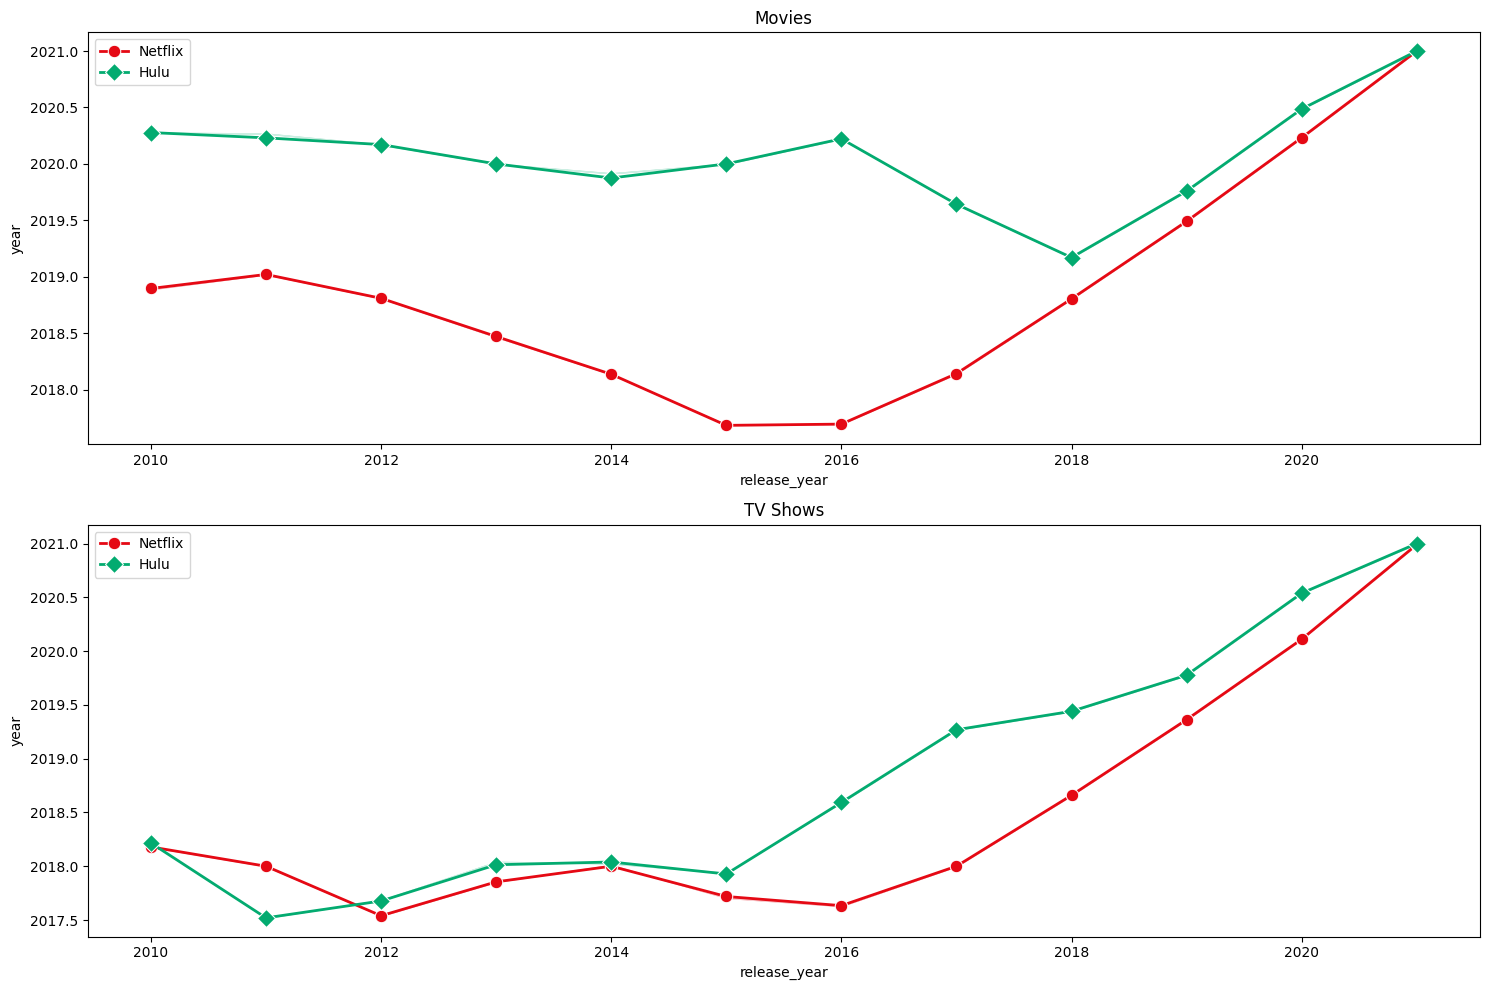

In [38]:
fig, ax = plt.subplots(2, 1, figsize=(15,10))

ax[0] = sns.lineplot(data=netflix[netflix['type']=='movie'], x='release_year', y='year', marker='o', markersize=9, ax=ax[0], color='#E50914',
                     label='Netflix', linewidth=2, errorbar=('ci', False))
ax[0] = sns.lineplot(data=hulu[hulu['type']=='movie'], x='release_year', y='year', marker='D', markersize=9, ax=ax[0], color='#03ab70',
                      label='Hulu', linewidth=2, errorbar=('ci', False))

ax[1] = sns.lineplot(data=netflix[netflix['type']=='tv show'], x='release_year', y='year', marker='o', markersize=9, ax=ax[1], color='#E50914',
                      label='Netflix', linewidth=2, errorbar=('ci', False))
ax[1] = sns.lineplot(data=hulu[hulu['type']=='tv show'], x='release_year', y='year', marker='D', markersize=9, ax=ax[1], color='#03ab70',
                      label='Hulu', linewidth=2, errorbar=('ci', False))

ax[0].set_title("Movies")
ax[1].set_title("TV Shows")

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">

#2 Geo plot
- word clouds of director/cast for each continent

In [3]:
netflix.head(2)

,type,country,date_added,month,day,year,release_year,rating,duration_min,duration_season,...,continent,country_cleaned,duration,listed_in,description,show_id,director,cast,title,country_cleaned_2
0,movie,united states,2021-09-25,9,25,2021,2020,pg-13,90.0,NaN,...,north america,['united states'],90 min,documentaries,"as her father nears the end of his life, filmm...",s1,kirsten johnson,missing,dick johnson is dead,united states
1,tv show,south africa,2021-09-24,9,24,2021,2021,tv-ma,NaN,2.0,...,africa,['south africa'],2 seasons,"international tv shows, tv dramas, tv mysteries","after crossing paths at a party, a cape town t...",s2,missing,"ama qamata, khosi ngema, gail mabalane, thaban...",blood & water,south africa


In [72]:
netflix_country = netflix['country_cleaned_2'].value_counts().reset_index()
netflix_country.columns = ['country', 'count']

hulu_country = hulu['country_cleaned_2'].value_counts().reset_index()
hulu_country.columns = ['country', 'count']

In [73]:
country_upd = []
for i in range(len(netflix_country)):
    if netflix_country['country'][i] == 'united states':
        country_upd.append("United States")
    else:
        w = netflix_country['country'][i].split(" ")
        w = [i[0].upper()+i[1:] for i in w]
        tmp = " ".join(w)
        country_upd.append(tmp)

netflix_country['country_upd'] = country_upd
netflix_country.drop([1,3], inplace=True)
netflix_country['percentage'] = round((netflix_country['count']/sum(netflix_country['count'].values))*100, 2)
netflix_country['count_log'] = np.log1p(netflix_country['count'])


In [74]:
country_upd = []
for i in range(len(hulu_country)):
    if hulu_country['country'][i] == 'united states':
        country_upd.append("United States")
    else:
        w = hulu_country['country'][i].split(" ")
        w = [i[0].upper()+i[1:] for i in w]
        tmp = " ".join(w)
        country_upd.append(tmp)
hulu_country['country_upd'] = country_upd
hulu_country.drop(2, inplace=True)
hulu_country['percentage'] = round((hulu_country['count']/sum(hulu_country['count'].values))*100, 2)
hulu_country['count_log'] = np.log1p(hulu_country['count'])

In [84]:
netflix_country.head()

,country,count,country_upd,percentage,count_log
0,united states,2297,United States,40.53,7.739794
2,india,773,India,13.64,6.651572
4,united kingdom,383,United Kingdom,6.76,5.950643
5,japan,201,Japan,3.55,5.308268
6,south korea,195,South Korea,3.44,5.278115



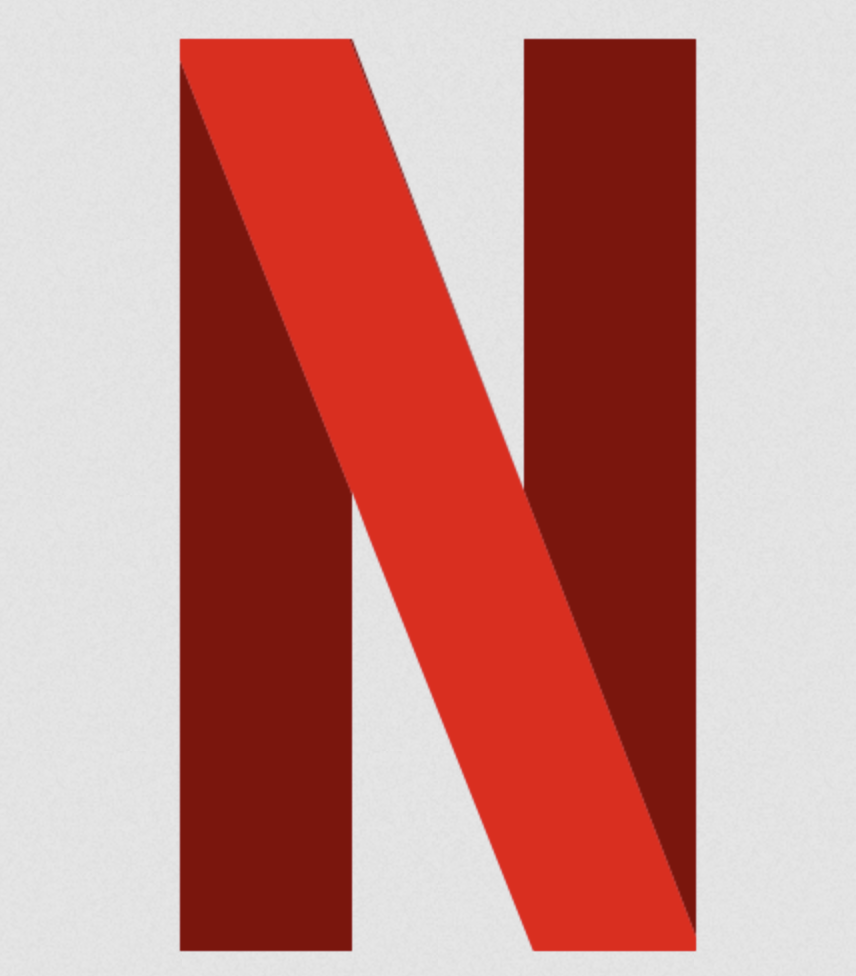
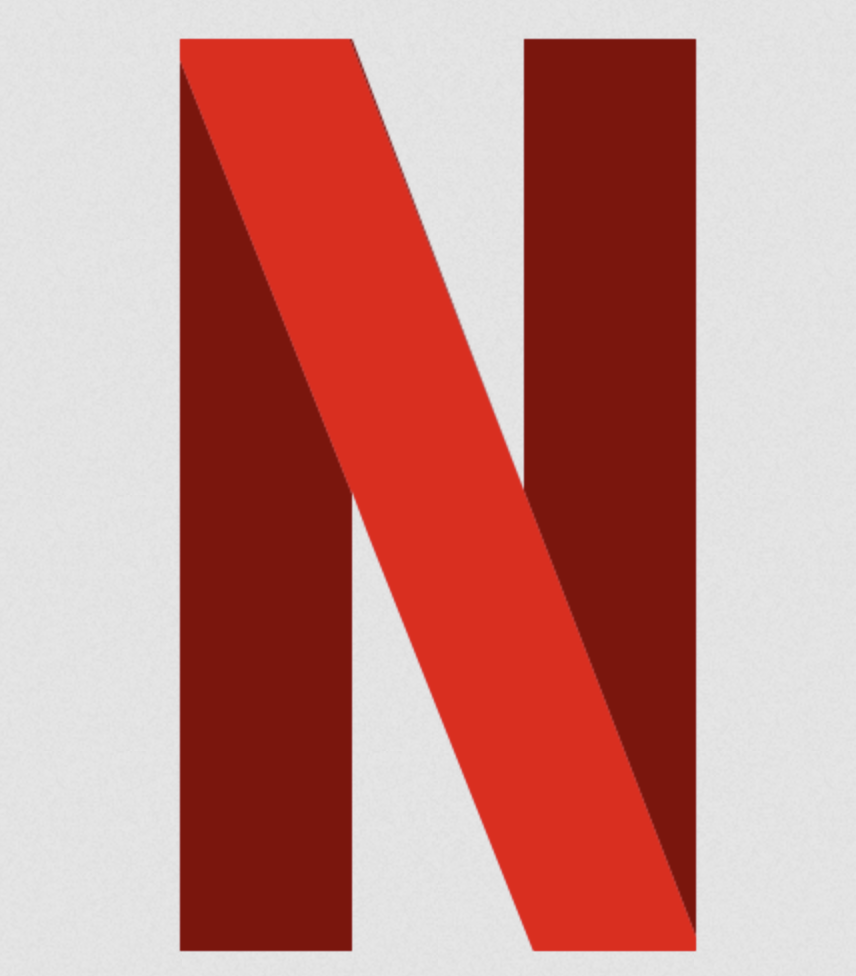
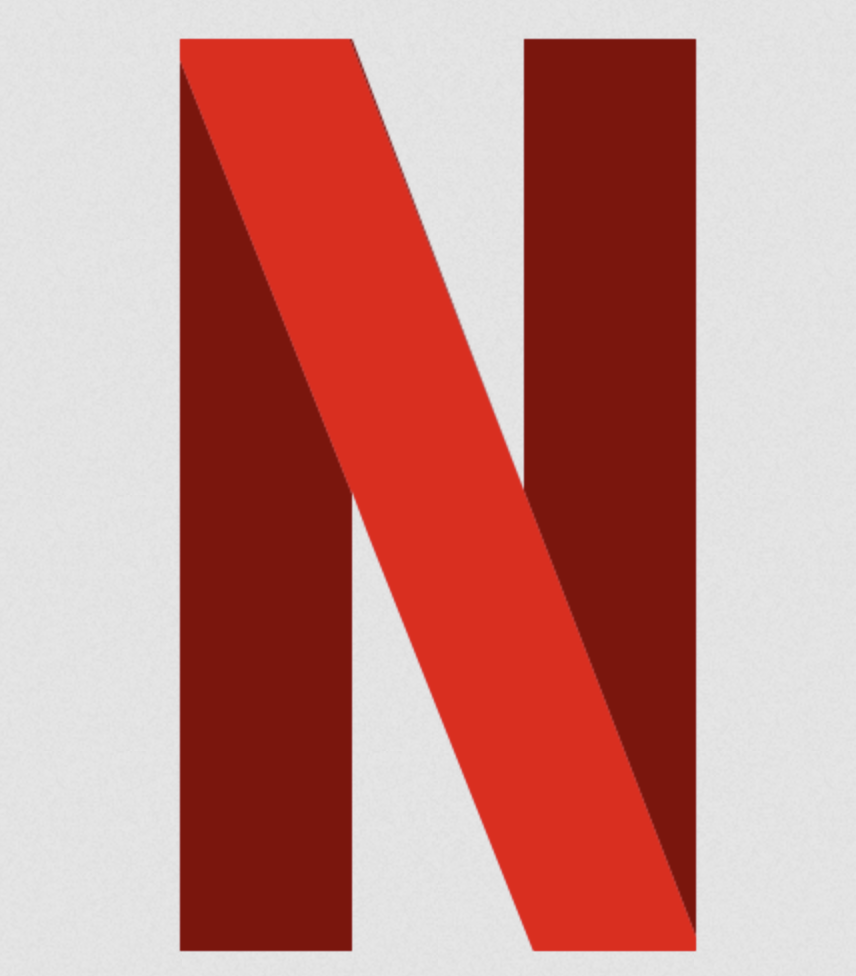

In [101]:
nf = folium.Map(location=[20, 0], zoom_start=2)
geo_json_url = 'https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson'

loc = 'Netflix - Country wise Content Production'
title_html = '''<h3 align="center" style="font-size:16px"><b>{}</b></h3>'''.format(loc)

title_html = '''<h3 align="center" style="font-size:16px"><b>{}</b></h3>'''.format(loc)  


data = [{'coord':[38, -105], 'text': "United States of America (40.53%)"},
        {'coord': [19, 78], 'text': "India (13.64%)"},
        {'coord': [53,3], 'text': 'United Kingdom (6.76%)'}]
for i in range(len(data)):
    netflix_icon = folium.features.CustomIcon('netflixicon.png', icon_size=(20,20))
    folium.Marker(data[i]['coord'], icon=netflix_icon, popup=folium.Popup(data[i]['text']),).add_to(nf)


folium.Choropleth(
    geo_data=geo_json_url,
    data=netflix_country,
    columns=['country_upd', 'count_log'],
    key_on='feature.properties.name',
    fill_color="Reds",
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='Percentage of Content by Country',
    highlight=True,
    nan_fill_color="#ffffff",
    nan_fill_opacity=0.7,
).add_to(nf)

nf.get_root().html.add_child(folium.Element(title_html))
# m.save('choropleth_map.html')
nf

In [86]:
hulu_country.head(5)

,country,count,country_upd,percentage,count_log
0,united states,1011,United States,74.39,6.919684
1,japan,172,Japan,12.66,5.153292
3,united kingdom,50,United Kingdom,3.68,3.931826
4,canada,32,Canada,2.35,3.496508
5,australia,11,Australia,0.81,2.484907



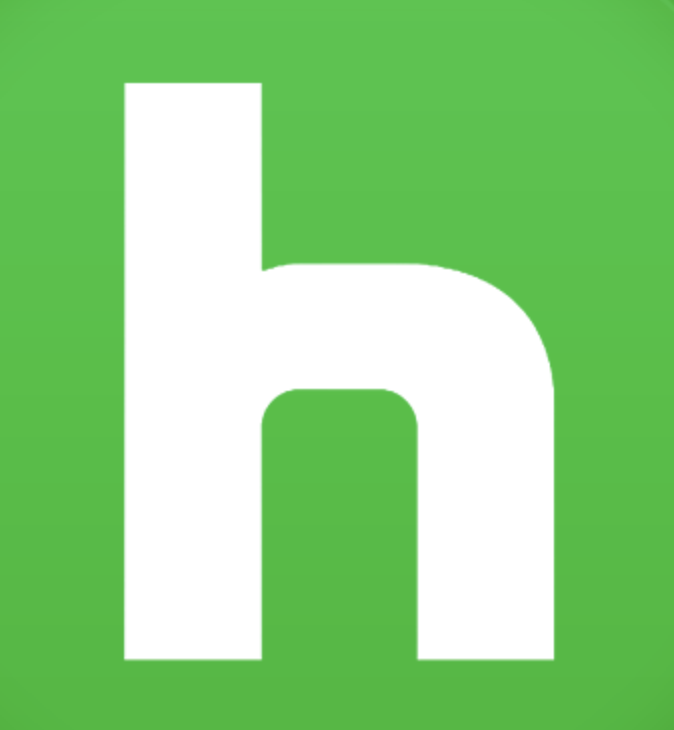
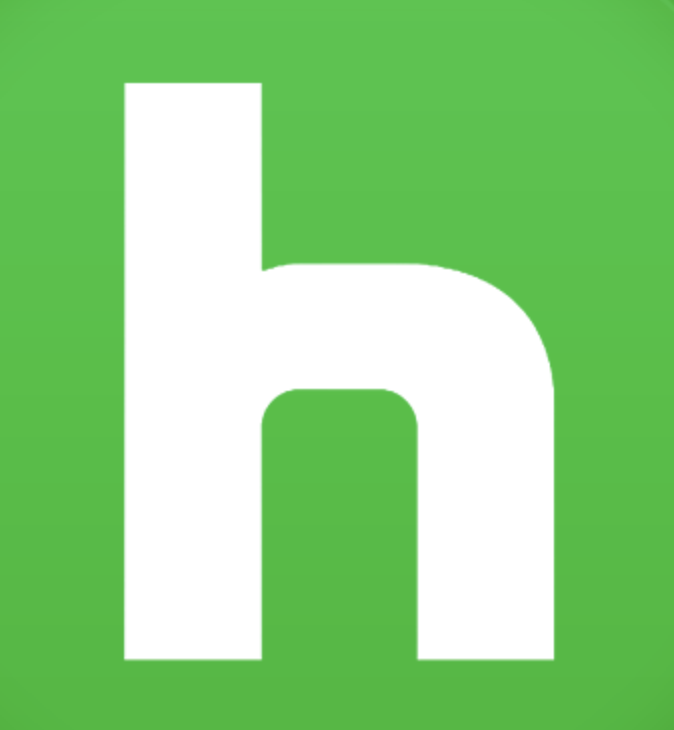
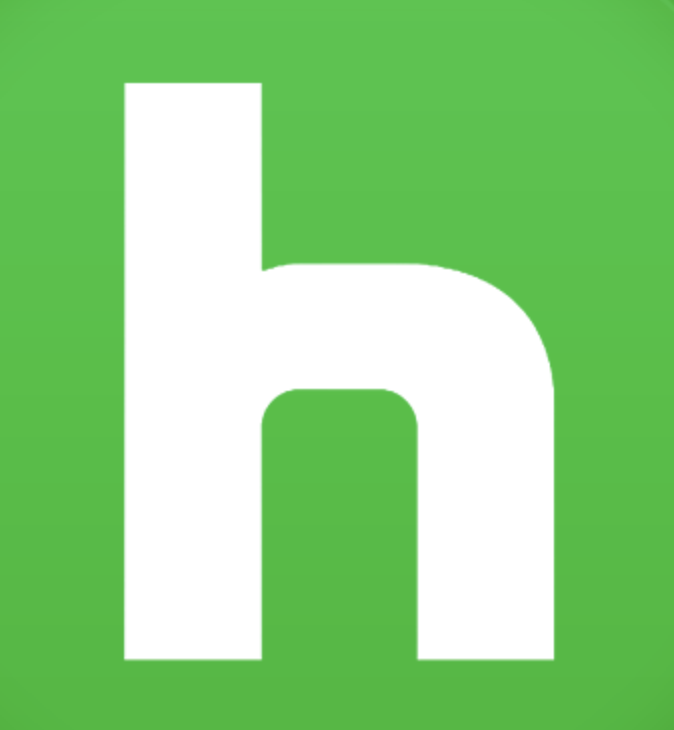

In [102]:
hl = folium.Map(location=[20, 0], zoom_start=2)
geo_json_url = 'https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson'

loc = 'Hulu - Country wise Content Production'

title_html = '''<h3 align="center" style="font-size:16px"><b>{}</b></h3>'''.format(loc)  

data = [{'coord':[38, -105], 'text': "United States of America (74.39%)", 'iconsize':(20,20)},
        {'coord': [35, 137], 'text': "Japan (12.66%)", 'iconsize':(20,20)},
        {'coord': [53,2], 'text': 'United Kingdom (3.68%)', 'iconsize':(20,20)}]
for i in range(len(data)):
    hulu_icon = folium.features.CustomIcon('huluicon.png', icon_size=data[i]['iconsize'])
    folium.Marker(data[i]['coord'], icon=hulu_icon, popup=folium.Popup(data[i]['text']),).add_to(hl)

# hulu_icon = folium.features.CustomIcon('huluicon.png', icon_size=(20,20))
# folium.Marker([53, 2], icon=hulu_icon, popup=folium.Popup("United Kingdom (3.68%)")).add_to(hl)

folium.Choropleth(
    geo_data=geo_json_url,
    data=hulu_country,
    columns=['country_upd', 'count_log'],
    key_on='feature.properties.name',
    fill_color="Greens",
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='Percentage of Content by Country',
    highlight=True,
    nan_fill_color="#ffffff",
    nan_fill_opacity=0.5
).add_to(hl)

hl.get_root().html.add_child(folium.Element(title_html))
# m.save('choropleth_map.html')
hl

In [454]:
n_continent_type = netflix.groupby(['continent']).count()
n_continent_type.reset_index(inplace=True)
n_continent_type.drop(3, inplace=True)

In [455]:
n_continent_type.sort_values('show_id', inplace=True)

In [456]:
h_continent_type = hulu.groupby(['continent']).count()
h_continent_type.reset_index(inplace=True)

In [457]:
h_continent_type.sort_values('show_id', inplace=True)

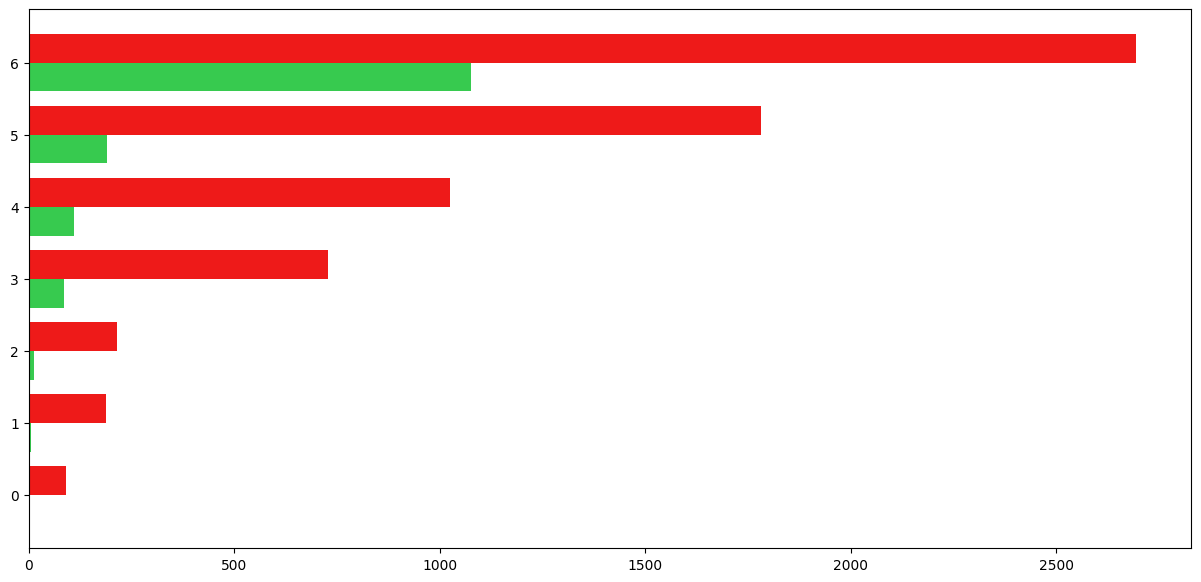

In [471]:
fig, ax = plt.subplots(figsize=(15,7))

# ax.barh(n_continent_type['continent'].values, n_continent_type['show_id'].values, height=0.5, color='#ed0100', alpha=0.9)
# ax.barh(h_continent_type['continent'].values, h_continent_type['show_id'].values, height=0.5, color='#21c53c', alpha=0.9)

ax.barh(np.arange(len(n_continent_type))+0.20, n_continent_type['show_id'].values, height=0.40, color='#ed0100', alpha=0.9)
ax.barh(np.arange(len(h_continent_type))-0.20, h_continent_type['show_id'].values, height=0.40, color='#21c53c', alpha=0.9)


plt.show()

# highlight top 2 for netflix and top 1 for hulu

<div class="alert alert-block alert-warning">

#3 Directors - ratings - cast

In [103]:
netflix_ratings = pd.read_csv("netflix_with_ratings.csv")
hulu_ratings = pd.read_csv("hulu_with_ratings.csv")

In [104]:
netflix_ratings.head(2)

,type,country,date_added,month,day,year,release_year,rating,duration_min,duration_season,...,continent,country_cleaned,duration,listed_in,description,show_id,director,cast,title,imdb_rating
0,movie,united states,2021-09-25,9,25,2021,2020,pg-13,90.0,NaN,...,north america,missing,90 min,documentaries,"as her father nears the end of his life, filmm...",s1,kirsten johnson,missing,dick johnson is dead,7.1
1,tv show,south africa,2021-09-24,9,24,2021,2021,tv-ma,NaN,2.0,...,africa,missing,2 seasons,"international tv shows, tv dramas, tv mysteries","after crossing paths at a party, a cape town t...",s2,missing,"ama qamata, khosi ngema, gail mabalane, thaban...",blood & water,6.8


In [113]:
netflix_ratings['imdb_rating'].replace('missing', np.nan, inplace=True)
netflix_ratings['imdb_rating'] = netflix_ratings['imdb_rating'].astype(float)

In [120]:
netflix_ratings.groupby('continent')['imdb_rating'].mean().values

array([6.91685393, 7.28160494, 7.14106383, 7.36194969, 7.14985337,
       7.22790507, 7.32666667, 7.24880952])

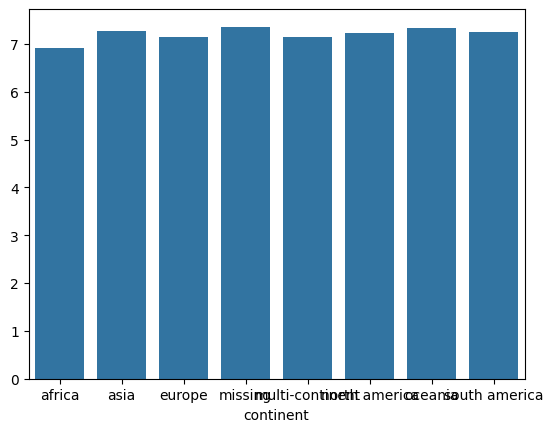

In [121]:
sns.barplot(x=netflix_ratings.groupby('continent')['imdb_rating'].mean().index, y=netflix_ratings.groupby('continent')['imdb_rating'].mean().values)
plt.show()

In [464]:
hulu_ratings.head(2)

,type,date_added,month,day,year,release_year,rating,duration_min,duration_season,difference,...,country_cleaned,country,duration,listed_in,description,show_id,director,cast,title,imdb_rating
0,movie,2021-10-23,10,23,2021,2021,pg-13,108,na,9,...,NaN,usa,108 min,"action, thriller",a hardened arizona rancher tries to protect an...,s3,missing,NaN,the marksman,6.8
1,movie,2021-10-22,10,22,2021,2021,r,97,na,9,...,NaN,south africa,97 min,horror,a forest ranger and two survivalists with a cu...,s4,missing,NaN,gaia,6.1


In [466]:
hulu_ratings['director'].value_counts()

director
missing                                                                                                                                                                       1482
director jennifer kent ("the babadook") tells the sweeping tale of a young woman's quest for revenge set in 1825 against the perilous and unforgiving terrain of tasmania.       1
director gigi saul guerrero talks through culture shock’s themes – immigration, filmmaking, and latinidad – in this one-on-one chat.                                             1
director alex winter goes inside the biggest global corruption scandal in history that was uncovered by hundreds of journalists, working in secret and at enormous risk.         1
Name: count, dtype: int64

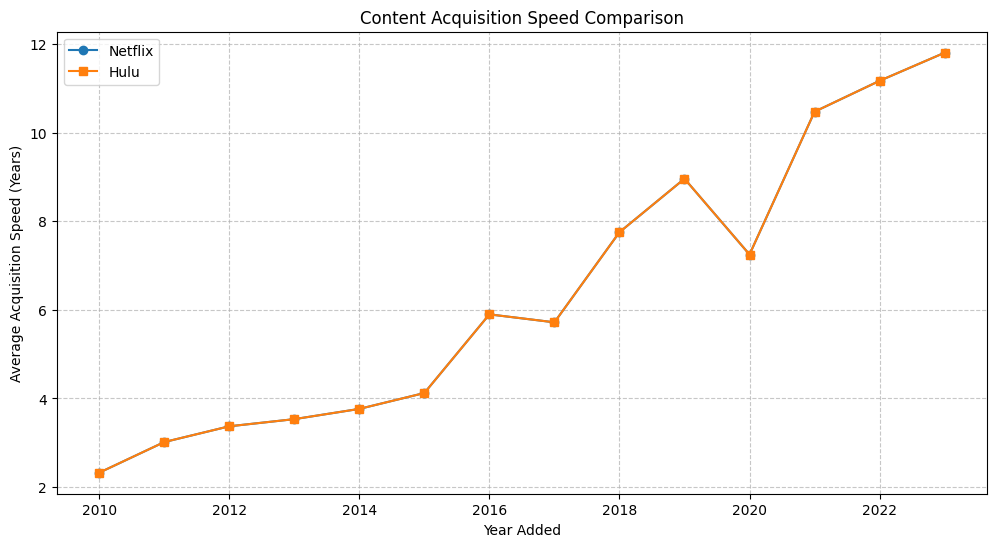

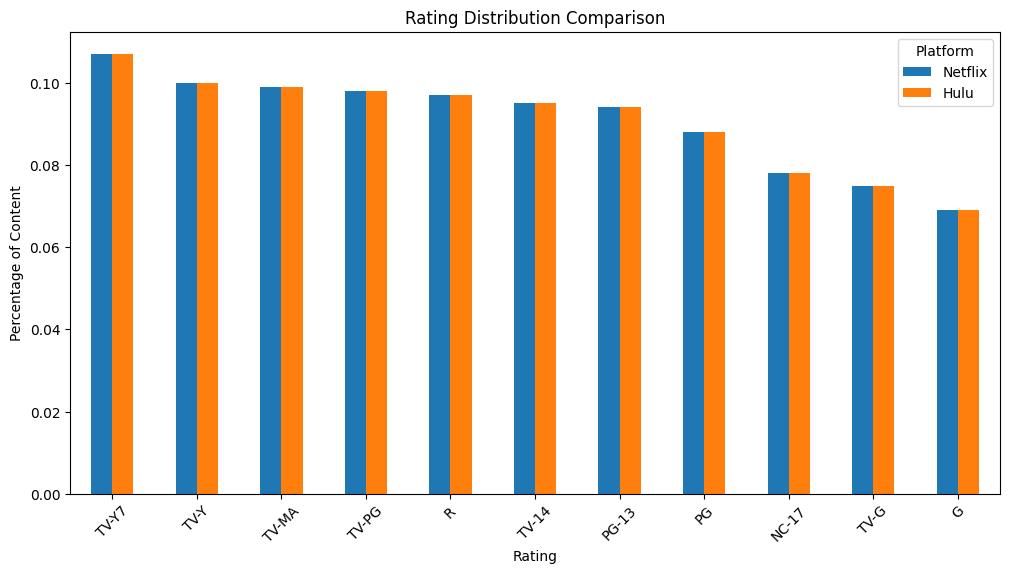

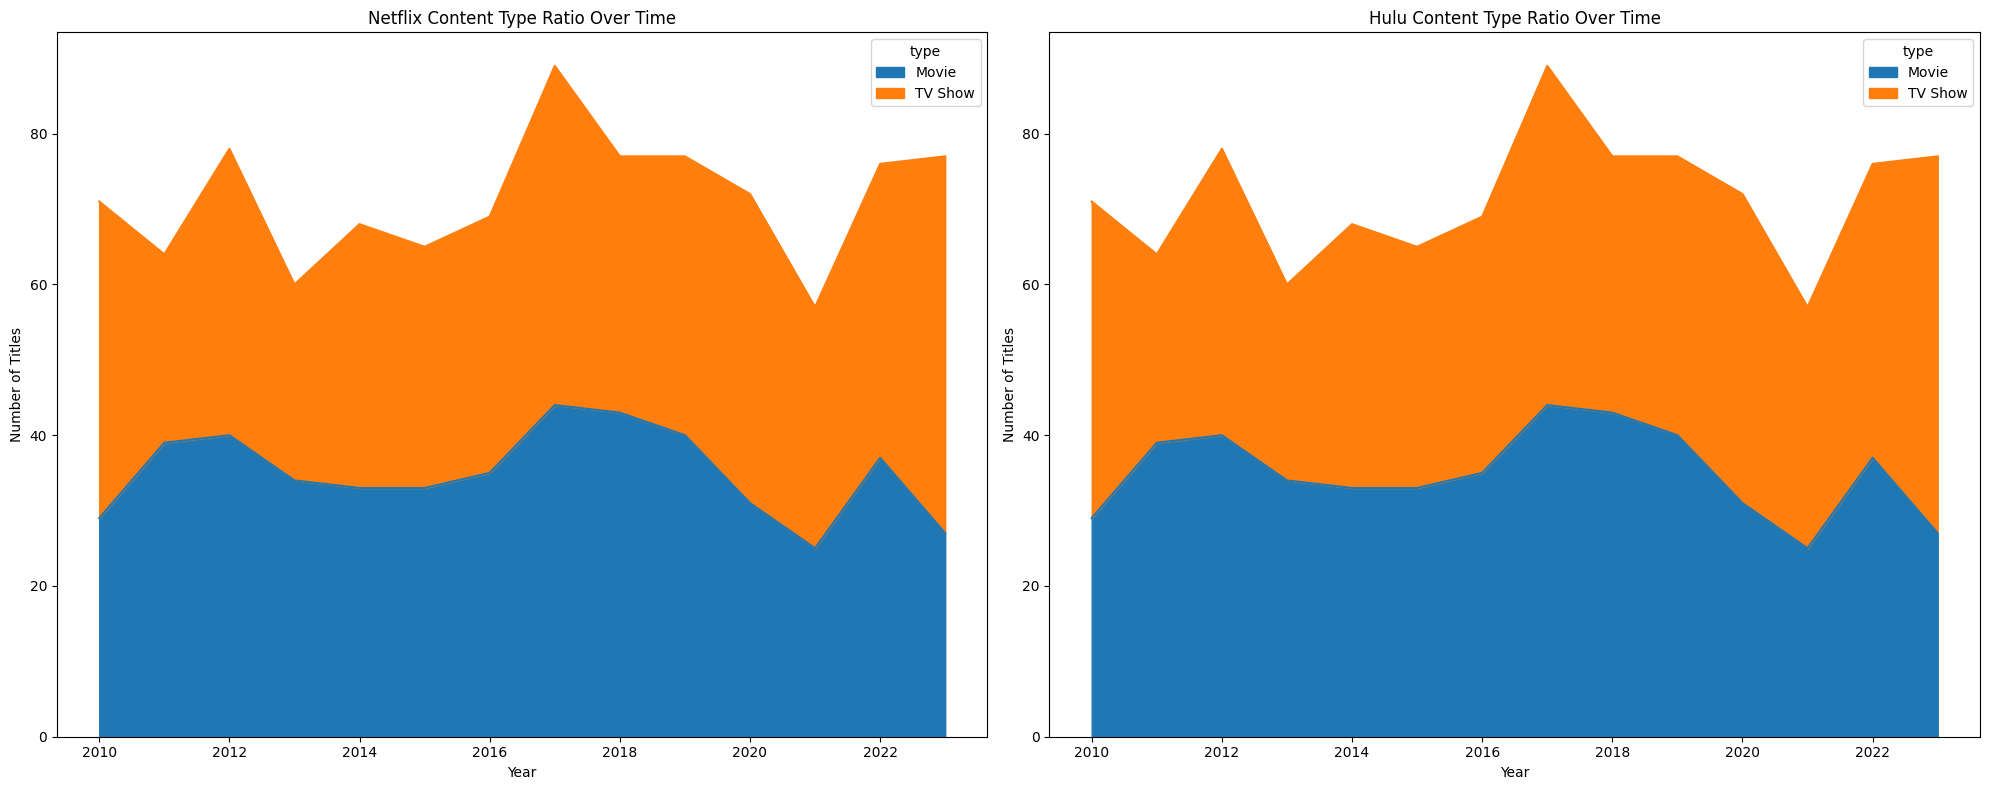

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime, timedelta

# Create dummy data
def create_dummy_data(platform, size=1000):
    np.random.seed(42)  # For reproducibility
    
    start_date = datetime(2010, 1, 1)
    end_date = datetime(2023, 12, 31)
    
    df = pd.DataFrame({
        'title': [f"{platform}_title_{i}" for i in range(size)],
        'type': np.random.choice(['Movie', 'TV Show'], size),
        'director': [f"Director_{i}" for i in np.random.randint(1, 50, size)],
        'cast': [f"Actor_{i}, Actor_{j}" for i, j in zip(np.random.randint(1, 100, size), np.random.randint(1, 100, size))],
        'release_year': np.random.randint(2000, 2024, size),
        'date_added': [start_date + timedelta(days=int(x)) for x in np.random.randint(0, (end_date - start_date).days, size)],
        'rating': np.random.choice(['G', 'PG', 'PG-13', 'R', 'NC-17', 'TV-Y', 'TV-Y7', 'TV-G', 'TV-PG', 'TV-14', 'TV-MA'], size),
        'genre': np.random.choice(['Drama', 'Comedy', 'Action', 'Thriller', 'Romance', 'Sci-Fi'], size)
    })
    
    df['acquisition_speed'] = (pd.to_datetime(df['date_added']).dt.year - df['release_year']).clip(lower=0)
    return df

netflix_df = create_dummy_data('Netflix')
hulu_df = create_dummy_data('Hulu')

# 1. Content Acquisition Speed Comparison
def plot_acquisition_speed(netflix_df, hulu_df):
    netflix_speed = netflix_df.groupby(pd.to_datetime(netflix_df['date_added']).dt.year)['acquisition_speed'].mean()
    hulu_speed = hulu_df.groupby(pd.to_datetime(hulu_df['date_added']).dt.year)['acquisition_speed'].mean()
    
    plt.figure(figsize=(12, 6))
    plt.plot(netflix_speed.index, netflix_speed.values, label='Netflix', marker='o')
    plt.plot(hulu_speed.index, hulu_speed.values, label='Hulu', marker='s')
    plt.title('Content Acquisition Speed Comparison')
    plt.xlabel('Year Added')
    plt.ylabel('Average Acquisition Speed (Years)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# # 2. Content Library Age Distribution
# def plot_library_age(netflix_df, hulu_df):
#     current_year = datetime.now().year
    
#     netflix_age = pd.cut(current_year - netflix_df['release_year'], 
#                          bins=[0, 2, 5, 10, np.inf], 
#                          labels=['0-2 years', '3-5 years', '6-10 years', '10+ years'])
#     hulu_age = pd.cut(current_year - hulu_df['release_year'], 
#                       bins=[0, 2, 5, 10, np.inf], 
#                       labels=['0-2 years', '3-5 years', '6-10 years', '10+ years'])
    
#     age_dist = pd.DataFrame({
#         'Netflix': netflix_age.value_counts(normalize=True),
#         'Hulu': hulu_age.value_counts(normalize=True)
#     })
    
#     age_dist.plot(kind='bar', figsize=(12, 6))
#     plt.title('Content Library Age Distribution')
#     plt.xlabel('Age Category')
#     plt.ylabel('Percentage of Content')
#     plt.legend(title='Platform')
#     plt.xticks(rotation=45)
#     plt.show()

# 3. Rating Distribution Comparison
def plot_rating_distribution(netflix_df, hulu_df):
    netflix_ratings = netflix_df['rating'].value_counts(normalize=True)
    hulu_ratings = hulu_df['rating'].value_counts(normalize=True)
    
    ratings = pd.concat([netflix_ratings, hulu_ratings], axis=1, keys=['Netflix', 'Hulu'])
    ratings.plot(kind='bar', figsize=(12, 6))
    plt.title('Rating Distribution Comparison')
    plt.xlabel('Rating')
    plt.ylabel('Percentage of Content')
    plt.legend(title='Platform')
    plt.xticks(rotation=45)
    plt.show()

# # 4. Genre Focus Analysis
# def plot_genre_focus(netflix_df, hulu_df):
#     netflix_genres = netflix_df['genre'].value_counts().reset_index()
#     netflix_genres.columns = ['genre', 'count']
#     netflix_genres['platform'] = 'Netflix'
    
#     hulu_genres = hulu_df['genre'].value_counts().reset_index()
#     hulu_genres.columns = ['genre', 'count']
#     hulu_genres['platform'] = 'Hulu'
    
#     genres = pd.concat([netflix_genres, hulu_genres])
    
#     fig = px.treemap(genres, path=['platform', 'genre'], values='count',
#                      color='platform', color_discrete_map={'Netflix': 'red', 'Hulu': 'green'})
#     fig.update_layout(title='Genre Focus Analysis')
#     fig.show()

# 5. Content Type Ratio Over Time
def plot_content_type_ratio(netflix_df, hulu_df):
    netflix_type = netflix_df.groupby([pd.to_datetime(netflix_df['date_added']).dt.year, 'type']).size().unstack()
    hulu_type = hulu_df.groupby([pd.to_datetime(hulu_df['date_added']).dt.year, 'type']).size().unstack()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    netflix_type.plot(kind='area', stacked=True, ax=ax1)
    ax1.set_title('Netflix Content Type Ratio Over Time')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Number of Titles')
    
    hulu_type.plot(kind='area', stacked=True, ax=ax2)
    ax2.set_title('Hulu Content Type Ratio Over Time')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Number of Titles')
    
    plt.tight_layout()
    plt.show()

# Call the functions
plot_acquisition_speed(netflix_df, hulu_df)
# plot_library_age(netflix_df, hulu_df)
plot_rating_distribution(netflix_df, hulu_df)
# plot_genre_focus(netflix_df, hulu_df)
plot_content_type_ratio(netflix_df, hulu_df)

### Getting ratings for the data

In [26]:
from dotenv import load_dotenv, dotenv_values
load_dotenv()

True

In [27]:
import os
from together import Together
api_key = os.getenv("together_api_key")
client = Together(api_key=api_key)


def get_results_from_model(titles):

    prompts = f"""You will be provided with a list of titles of movies/tv shows. 
    Your job is to give the ratings of those titles.
    These are the list of titles: {titles}
    Strictly return your response as a json where the keys are the titles and the values are the ratings. Donot include any other information.
    Follow the below response template:
    Output:
          {{
            "title1": rating1,
            "title2": rating2,
            ...
          }}
    """
    client = Together(api_key=api_key)
    response = client.chat.completions.create(
       model="meta-llama/Llama-3-70b-chat-hf",
       messages=[{"role": "user", "content": prompts}],
    )

    # Extract the selected option from the response
    response = response.choices[0].message.content.strip()
    return response

In [29]:
# global_ratings = []
# for i in tqdm(range(0,len(hulu),200)):
#     ratings = get_results_from_model(list(hulu.loc[i:i+200]['title'].values))
#     global_ratings.append(ratings)


# tmp = global_ratings[1].replace("\n","")
# tmp = tmp[tmp.index('{'): tmp.index('}')+1]


# global_list = []
# for i in global_ratings:
#     try:
#         tmp = i.replace("\n","")
#         tmp = tmp[tmp.index('{'): tmp.index('}')+1]
#         global_list.append(tmp)
#     except:
#         print(global_ratings.index(i))


# global_list__ = []
# for i in global_list:
#     try:
#         global_list__.append(ast.literal_eval(i))
#     except:
#         print(global_list.index(i))

# merged_dict = {key: val for dictionary in global_list__ for key, val in dictionary.items()}

In [28]:
# imdb_ratings = []
# for i in range(len(netflix)):
#     try:
#         imdb_ratings.append(merged_dict[netflix['title'][i]])
#     except:
#         imdb_ratings.append('missing')

# netflix['imdb_rating'] = imdb_ratings
# netflix.to_csv("netflix_with_ratings.csv", index=False)


# imdb_ratings = []
# for i in range(len(hulu)):
#     try:
#         imdb_ratings.append(merged_dict[hulu['title'][i]])
#     except:
#         imdb_ratings.append('missing')

# hulu['imdb_rating'] = imdb_ratings
# hulu.to_csv("hulu_with_ratings.csv", index=False)

#